# Regresion logistica usando tensorflow

Luego de aprender lo basico y de que trata la regresion logistica en scikit learn, podemos adentrarnos mas y hacer un modelo por nuestra cuenta usando tensorflow

In [1]:
import tensorflow as tf

import pandas as pd

import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


**Usaremos nuevamente el dataset de iris que en pocas palabras se trata de colores de flores con sus petalos,sepalos,tamaños y dimensiones**

1. El sépalo es una parte de la flor que protege y sostiene los órganos reproductores 

2. El pétalo es la parte de la flor que a menudo es colorida y atractiva para los polinizadores

Variables son 

**Attributes Independent Variable**

- petal length (longitud petalo)
- petal width  (ancho del petalo)
- sepal length (Longitud del sepalo)
- sepal width (ancho del sépalo)

**Dependent Variable**
- Species
- Iris setosa (tipo de planta)
- Iris virginica
- Iris versicolor

![partesFlor](220px-Pétalo-sépalo.jpg)

In [2]:
iris=load_iris()

iris_x,iris_y=iris.data[:-1,:], iris.target[:-1]#Verificar que tendran el mismo tamaño de datos iris_X y iris_y

iris_y=pd.get_dummies(iris_y).values #Se crea un dummie con el tipo de iris de las flores para categorizar mejor, luego values lo pasa a un arrelglo para el modelo luego



In [3]:
print(iris_x.shape)

print(iris_y.shape)

(149, 4)
(149, 3)


**Como vemos si son compatibles**

- iris.data[:-1,-1:]: Esto selecciona todas las filas de iris.data excepto la última fila ([:-1]), y solo la última columna ([-1:]). En otras palabras, está seleccionando la última característica de todas las flores de iris excepto la última.
  
- iris.target[:-1]: Esto selecciona todas las filas de iris.target excepto la última fila ([:-1]). En otras palabras, está seleccionando las etiquetas de todas las flores de iris excepto la última.

In [4]:
# train ,test siempre en ese orden 
x_train,x_test,y_train,y_Test =train_test_split(iris_x,iris_y,test_size=0.37,random_state=47)

numFeatures=x_train.shape[1] #Se le da un numero de etiquetas a los datos x de entrenamiento son las 4 tipos de variables que existen

# [0] para sus filas y [1] para sus columnas

print('numFeatures is : ', numFeatures ) #Columnas de x_train 

numFeatures is :  4


In [5]:
numLabels = y_train.shape[1]
print('numLabels is : ', numLabels ) #Columnas de  y_Train


numLabels is :  3


# Creamos nuestros tensores Constantes

In [6]:
x_train=tf.constant(x_train,dtype='float32')

x_test=tf.constant(x_test,dtype='float32')

y_train=tf.constant(y_train,dtype='float32')

y_Test=tf.constant(y_Test,dtype='float32')




Recordemos varias formulas que utilizaremos para la regresion logistica

$$\text{Regresion lineal}$$

$$y=MX+B$$

$$\text{Funcion sigmoide }$$
# Funcion sigmoide

La función sigmoide es una función matemática que tiene una curva característica en forma de “S”. Esta función transforma los valores entre el rango 0 y 1.

La expresión matemática para la función sigmoide es

$$\sigma=\frac{1}{1+e^{-MX}}$$

La función sigmoide es diferenciable y tiene una derivada no negativa en cada punto. Además, tiene exactamente un punto de inflexión1.

Esta función es especialmente útil en varias aplicaciones, incluyendo las redes neuronales artificiales, donde se utiliza como una función de activación. En este contexto, la función sigmoide se utiliza para mapear los valores de entrada de las neuronas a un rango entre 0 y 1, lo que puede interpretarse como una probabilidad.


![funcionSigmoide](sigmoideFunction.png)







# <h3>Establecer pesos y sesgos del modelo</h3>

Al igual que la regresión lineal, necesitamos una matriz de ponderación de variable compartida para la regresión logística. Inicializamos tanto <code>M</code> como <code>b</code> como tensores llenos de ceros. Como vamos a aprender <code>M</code> y <code>b</code>, su valor inicial no importa demasiado. Estas variables son los objetos que definen la estructura de nuestro modelo de regresión y podemos guardarlas después de haberlas entrenado para poder reutilizarlas más tarde.

Definimos dos variables de TensorFlow como nuestros parámetros. Estas variables contendrán los pesos y sesgos de nuestra regresión logística y se actualizarán continuamente durante el entrenamiento.

Observe que <code>M</code> tiene una forma de [4, 3] porque queremos multiplicar los vectores de entrada de 4 dimensiones para producir vectores de evidencia de 3 dimensiones para las clases de diferencia. <code>b</code> tiene la forma de [3], por lo que podemos agregarlo a la salida. Las variables de TensorFlow deben inicializarse con valores, p. con ceros.

Este 4 y 3 salen de las columnas obtenidas de `x_Train`, `y_train`

In [7]:
m = tf.Variable(tf.zeros([4, 3]))  # Su tamaño sale de las dimensiones entre los datos de x y y de entreno de las columnas

b = tf.Variable(tf.zeros([3])) # 3-dimensional tensor , es de 3 columnas pues son 3 las clases a clasificar segun el dataset


In [8]:
weights = tf.Variable(tf.random.normal([numFeatures,numLabels], #Pesos del modelo
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


bias = tf.Variable(tf.random.normal([1,numLabels], #Sesgo del modelo
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))

Este fragmento de código está inicializando los pesos y el sesgo para un modelo de regresión logística utilizando TensorFlow. Aquí te explico cada parte:

- `weights = tf.Variable(tf.random.normal([numFeatures,numLabels], mean=0., stddev=0.01, name="weights"),dtype='float32')`: Aquí se está creando una variable TensorFlow para los pesos del modelo. Se inicializan con valores aleatorios extraídos de una distribución normal con media 0 y desviación estándar 0.01. La forma de la matriz de pesos es `[numFeatures,numLabels]`, lo que significa que hay un peso para cada combinación de característica y etiqueta.

- `bias = tf.Variable(tf.random.normal([1,numLabels], mean=0., stddev=0.01, name="bias"))`: Aquí se está creando una variable TensorFlow para el sesgo del modelo. Al igual que los pesos, el sesgo se inicializa con valores aleatorios extraídos de una distribución normal con media 0 y desviación estándar 0.01. La forma de la matriz de sesgo es `[1,numLabels]`, lo que significa que hay un término de sesgo para cada etiqueta.

`tf.random.normal` es una función en TensorFlow que genera una matriz de números aleatorios, cada uno de los cuales sigue una distribución normal (también conocida como distribución gaussiana).

Los parámetros de la función son:

- `shape`: Esta es la forma de la matriz de salida que quieres generar. Por ejemplo, si quieres una matriz de 2x3, pasarías `[2, 3]` como la forma.

- `mean`: Este es el promedio de la distribución normal que quieres usar. Por defecto es 0.

- `stddev`: Esta es la desviación estándar de la distribución normal que quieres usar. Por defecto es 1.

- `dtype`: Este es el tipo de datos de los números en la matriz de salida. Por defecto es `tf.float32`.

- `seed`: Este es el valor inicial para la generación de números aleatorios. Si especificas una semilla, podrás reproducir los mismos números aleatorios cada vez que ejecutes tu código.

- `name`: Este es un nombre para la operación. Esto puede ser útil si estás construyendo un gráfico de TensorFlow más grande y quieres dar nombres a las operaciones específicas.

Estos pesos y sesgos se actualizarán durante el entrenamiento del modelo para minimizar la función de pérdida y mejorar la precisión del modelo.


## $$W=M$$


<h3>Modelo de regresión logística</h3>

Ahora definimos nuestras operaciones para ejecutar correctamente la Regresión Logística. Generalmente se piensa en la regresión logística como una ecuación única:

$$
ŷ =sigmoid(WX+b)
$$

Sin embargo, en aras de la claridad, podemos dividirlo en sus tres componentes principales:

- un peso multiplicado presenta una operación de multiplicación de matrices,
- una suma de las características ponderadas y un término de sesgo,
- y finalmente la aplicación de una función sigmoidea.

In [9]:
def logistic_regression(x):
    apply_weights_OP = tf.matmul(x, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP

Esta función `logistic_regression` implementa la ecuación de la regresión logística. 

1. `apply_weights_OP = tf.matmul(x, weights, name="apply_weights")`: Esta línea realiza la multiplicación matricial de los datos de entrada `x` con los pesos del modelo. Esto es equivalente a aplicar los pesos a las características de entrada.

2. `add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias")`: Esta línea suma el sesgo al resultado de la multiplicación matricial de la línea anterior. Esto es equivalente a añadir el término de sesgo a la ecuación de regresión.

3. `activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")`: Esta línea aplica la función sigmoide al resultado de la suma del sesgo. La función sigmoide transforma los valores a un rango entre 0 y 1, lo que permite interpretar la salida como una probabilidad.

4. `return activation_OP`: Finalmente, la función devuelve el resultado de la función sigmoide. Este es el valor de probabilidad predicho por el modelo para la clase positiva.

En resumen, esta función toma los datos de entrada, aplica los pesos y el sesgo, y luego pasa el resultado a través de la función sigmoide para obtener una probabilidad. Esta es la esencia de cómo funciona la regresión logística.


<a id="ref3"></a>

<h2>Entrenamiento</h2>

El algoritmo de aprendizaje es cómo buscamos el mejor vector de peso (${\\\\bf w}$). Esta búsqueda es un problema de optimización que busca la hipótesis que optimice una medida de error/coste.

<b>¿Qué nos dice que nuestro modelo es malo?</b>

El Costo o Pérdida del modelo, entonces lo que queremos es minimizarlo.

<h3>Función de coste</h3>

Antes de definir nuestra función de costos, debemos definir cuánto tiempo vamos a entrenar y cómo debemos definir la tasa de aprendizaje.

In [10]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,
                                          decay_steps=x_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

Este fragmento de código está configurando dos aspectos importantes del entrenamiento de tu modelo de regresión logística: el número de épocas y la tasa de aprendizaje.

1. `numEpochs = 700`: Aquí estás definiendo el número de épocas para el entrenamiento de tu modelo. Una época es una iteración completa a través de todo el conjunto de datos de entrenamiento. En este caso, estás configurando tu modelo para que se entrene durante 700 épocas.

2. `learningRate = tf.keras.optimizers.schedules.ExponentialDecay(...)`: Aquí estás definiendo la tasa de aprendizaje de tu modelo utilizando una decaimiento exponencial. La tasa de aprendizaje controla cuánto se actualizan los parámetros del modelo en cada paso del entrenamiento. Con el decaimiento exponencial, la tasa de aprendizaje disminuirá exponencialmente a medida que avanza el entrenamiento.

   - `initial_learning_rate=0.0008`: Esta es la tasa de aprendizaje inicial.
   - `decay_steps=trainX.shape[0]`: Este es el número de pasos de entrenamiento que debe tomar antes de que la tasa de aprendizaje comience a decaer.
   - `decay_rate=0.95`: Este es el factor de decaimiento. Una tasa de decaimiento de 0.95 disminuirá la tasa de aprendizaje en un 5% en cada `decay_steps`.
   - `staircase=True`: Si es `True`, la tasa de aprendizaje decae de manera discreta en lugar de continua, como si bajara por una escalera.


<b>¿Cuál es la función de costos en nuestro modelo?</b>
La función de costo que vamos a utilizar es la función de pérdida de error medio cuadrático.

<b>¿Cómo minimizar la función de costes?</b>

No podemos usar <b>regresión lineal de mínimos cuadrados</b> 
aquí, por lo que usaremos descenso de gradiente</a> en su lugar. . Específicamente, utilizaremos el descenso de gradiente por lotes, que calcula el gradiente a partir de todos los puntos de datos del conjunto de datos.

In [11]:
#Creamos la funcion de perdida usando la error medio cuadratico
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

optimizer = tf.keras.optimizers.SGD(learningRate) #Optimizamos la taza de aprendizaje con la funcion de keras



In [12]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Esta función `accuracy` calcula la precisión de las predicciones de un modelo de clasificación. Aquí te explico cada parte:

1. `correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))`: Esta línea compara las clases predichas con las clases verdaderas. `tf.argmax(y_pred, 1)` devuelve la clase predicha, que es el índice de la mayor probabilidad en cada vector de predicción. `tf.argmax(y_true, 1)` devuelve la clase verdadera, que es el índice del valor 1 en cada vector de etiqueta verdadera (asumiendo que las etiquetas verdaderas están en formato one-hot). `tf.equal` devuelve `True` para las predicciones correctas y `False` para las incorrectas.

2. `return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))`: Esta línea calcula la precisión del modelo. Primero, `tf.cast(correct_prediction, tf.float32)` convierte la matriz de booleanos `correct_prediction` en una matriz de flotantes, con `True` convertido en `1.0` y `False` convertido en `0.0`. Luego, `tf.reduce_mean` calcula la media de esta matriz, que es la proporción de predicciones correctas, es decir, la precisión del modelo.



In [13]:
# Optimization process. , Hallamos los gradientes para poder usarlos en el modelo

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

La función `run_optimization` es una parte esencial del entrenamiento de un modelo de regresión logística en TensorFlow. Aquí está lo que hace cada línea de código:

1. `with tf.GradientTape() as g:`: TensorFlow utiliza un objeto `GradientTape` para registrar las operaciones que se realizan dentro de su contexto. Esto permite calcular automáticamente los gradientes de las variables con respecto a una pérdida.

2. `pred = logistic_regression(x)`: Esta línea predice las salidas (o etiquetas) para las entradas dadas `x` utilizando el modelo de regresión logística.

3. `loss = loss_object(pred, y)`: Aquí se calcula la pérdida entre las etiquetas predichas `pred` y las etiquetas reales `y` utilizando un objeto de pérdida (por ejemplo, la entropía cruzada para la clasificación).

4. `gradients = g.gradient(loss, [weights, bias])`: Esta línea calcula los gradientes de la pérdida con respecto a las variables del modelo (en este caso, los pesos y el sesgo). Estos gradientes se utilizarán para actualizar las variables del modelo.

5. `optimizer.apply_gradients(zip(gradients, [weights, bias]))`: Finalmente, esta línea aplica los gradientes calculados a las variables del modelo utilizando un optimizador. Esto actualiza los pesos y el sesgo en la dirección que minimiza la pérdida.



# Loop de entreno

In [14]:
# Initialize reporting variables
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(x_train, y_train)
        
        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_regression(x_train)

            newLoss = loss_object(pred, y_train)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            acc = accuracy(pred, y_train)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

        

          

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())





step 0, training accuracy 0.397849, loss 0.134017, change in loss 0.134017
step 10, training accuracy 0.397849, loss 0.133457, change in loss 0.00056009
step 20, training accuracy 0.397849, loss 0.132906, change in loss 0.000551552
step 30, training accuracy 0.397849, loss 0.132363, change in loss 0.000542998
step 40, training accuracy 0.397849, loss 0.131828, change in loss 0.00053452


step 50, training accuracy 0.397849, loss 0.131302, change in loss 0.000526026
step 60, training accuracy 0.397849, loss 0.130784, change in loss 0.000517607
step 70, training accuracy 0.397849, loss 0.130275, change in loss 0.000509217
step 80, training accuracy 0.397849, loss 0.129774, change in loss 0.000500873
step 90, training accuracy 0.397849, loss 0.129282, change in loss 0.000492617
step 100, training accuracy 0.397849, loss 0.128817, change in loss 0.00046514
step 110, training accuracy 0.397849, loss 0.128364, change in loss 0.000452921
step 120, training accuracy 0.397849, loss 0.127918, change in loss 0.000445589
step 130, training accuracy 0.397849, loss 0.12748, change in loss 0.000438362
step 140, training accuracy 0.397849, loss 0.127048, change in loss 0.00043121
step 150, training accuracy 0.397849, loss 0.126624, change in loss 0.000424087
step 160, training accuracy 0.397849, loss 0.126207, change in loss 0.000417024
step 170, training accuracy 0.397849, loss 0.125


1. **Inicialización de variables**: Al principio, se inicializan varias variables que se utilizarán para rastrear el progreso del entrenamiento. Esto incluye listas para almacenar los valores de las épocas, la precisión y la pérdida, así como variables para la pérdida y la diferencia en la pérdida entre las épocas.

2. **Bucle de entrenamiento**: El bucle `for` recorre un número determinado de épocas de entrenamiento. En cada época, se realiza un paso de optimización (es decir, se actualizan los pesos del modelo) utilizando la función `run_optimization`.

3. **Convergencia temprana**: Si la diferencia en la pérdida entre las épocas es menor que un cierto umbral (en este caso, 0.0001), el algoritmo concluye que el modelo ha convergido y detiene el entrenamiento.

4. **Registro de estadísticas**: En cada época, si la época es un múltiplo de `display_step`, el algoritmo calcula la pérdida y la precisión del modelo en los datos de prueba, y registra estos valores. También calcula la diferencia en la pérdida desde la última época.

5. **Impresión de resultados**: Finalmente, una vez que se ha completado el entrenamiento, el algoritmo imprime la precisión final del modelo en el conjunto de prueba.

En resumen, este algoritmo está entrenando un modelo de regresión logística, monitoreando su rendimiento a lo largo del tiempo, y deteniendo el entrenamiento una vez que el modelo ha convergido.




1. `for i in range(numEpochs):` Este es el inicio del bucle `for`, que se ejecutará para un número determinado de épocas (iteraciones completas a través del conjunto de datos de entrenamiento). El número de épocas es `numEpochs`.

2. `if i > 1 and diff < .0001:` Aquí se comprueba si la diferencia en la pérdida entre las épocas consecutivas es menor que 0.0001, y si se han completado al menos dos épocas. Si ambas condiciones se cumplen, significa que el modelo ha convergido y se detiene el entrenamiento.

3. `run_optimization(trainX, trainY)`: Aquí se realiza un paso de optimización, que actualiza los pesos del modelo basándose en los gradientes de la función de pérdida. La función `run_optimization` se aplica al conjunto de entrenamiento.

4. `if i % display_step == 0:` Aquí se comprueba si la época actual es un múltiplo de `display_step`. Si es así, se calculan y registran las estadísticas del modelo.

5. `epoch_values.append(i)`: Aquí se añade el número de la época actual a la lista `epoch_values`.

6. `pred = logistic_regression(testX)`: Aquí se calculan las predicciones del modelo para el conjunto de prueba.

7. `newLoss = loss_object(pred, testY)`: Aquí se calcula la pérdida del modelo en el conjunto de prueba.

8. `loss_values.append(newLoss)`: Aquí se añade la pérdida calculada a la lista `loss_values`.

9. `acc = accuracy(pred, testY)`: Aquí se calcula la precisión del modelo en el conjunto de prueba.

10. `accuracy_values.append(acc)`: Aquí se añade la precisión calculada a la lista `accuracy_values`.

11. `diff = abs(newLoss - loss)`: Aquí se calcula la diferencia absoluta en la pérdida desde la última época.

12. `loss = newLoss`: Aquí se actualiza el valor de la pérdida para la próxima iteración.

Espero que esto te ayude a entender mejor lo que está sucediendo en el bucle `for`. Si tienes más preguntas, no dudes en hacerlas.

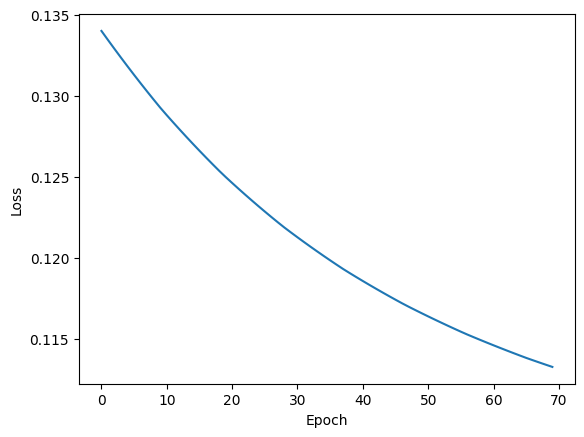

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()



1. **Disminución de la pérdida**: La pérdida de tu modelo parece estar disminuyendo a medida que aumenta el número de épocas. Esto es una buena señal y sugiere que tu modelo está aprendiendo de los datos de entrenamiento y mejorando su rendimiento a lo largo del tiempo.

2. **Convergencia del modelo**: La curva de pérdida parece estar acercándose a un valor mínimo y estabilizándose, lo que sugiere que tu modelo puede estar convergiendo. Esto significa que las actualizaciones adicionales a los pesos del modelo durante el entrenamiento están resultando en mejoras incrementales más pequeñas en la pérdida del modelo.

